In [1]:
import torch
import pickle
import os,sys
os.environ["CUDA_VISIBLE_DEVICES"]="0"
sys.path.append("../../")
import matplotlib.pyplot as plt

from human_aware_rl.rllib.rllib import reset_dummy_policy, gen_trainer_from_params
from human_aware_rl.rllib.utils import get_base_ae
from human_aware_rl.dummy.rl_agent import *

from overcooked_ai_py.agents.benchmarking import AgentEvaluator
from overcooked_ai_py.agents.agent import AgentPair, FixedPlanAgent, GreedyHumanModel, RandomAgent, SampleAgent
from overcooked_ai_py.visualization.state_visualizer import StateVisualizer

pygame 2.1.2 (SDL 2.0.16, Python 3.7.13)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
def load_checkpoint(file_path):
    assert os.path.isfile(file_path)
    with open(file_path, 'rb') as file:
        checkpoint = pickle.load(file)
    return checkpoint

<function matplotlib.pyplot.show(close=None, block=None)>

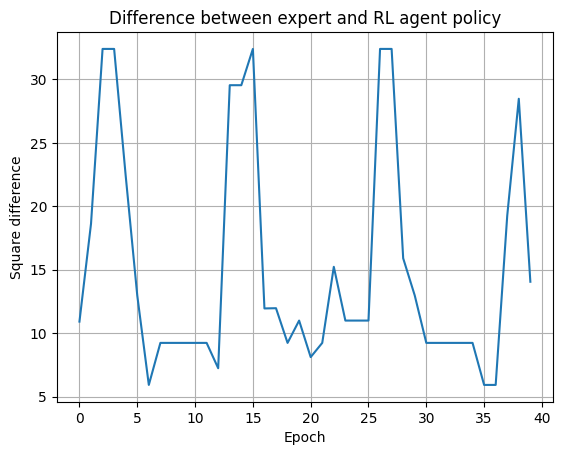

In [21]:
ckpt = '/home/jasmine/moral-ai-irl/human_aware_rl_master/human_aware_rl/irl/result/human/T3_white/epoch=40.checkpoint'
info = load_checkpoint(ckpt)
diff_log = [info['diff_log'][i].item() for i in range(0, len(info['diff_log']))]

plt.title("Difference between expert and RL agent policy")
plt.xlabel("Epoch")
plt.ylabel("Square difference")

plt.plot(range(0, len(diff_log)), diff_log,)
plt.grid()
plt.show


In [26]:
ckpt_traj = "/home/jasmine/moral-ai-irl/human_aware_rl_master/human_aware_rl/irl/result/human/T3_white/epoch=10.trajectory"
cp_trajs = load_checkpoint(ckpt_traj)
assert type(cp_trajs) == list
print(f'{len(cp_trajs)} trajectories in this file')

1 trajectories in this file


In [27]:
StateVisualizer().display_rendered_trajectory(
    cp_trajs[0], 
    ipython_display=True, 
    img_directory_path='/home/jasmine/moral-ai-irl/human_aware_rl_master/human_aware_rl/irl/visualization'
)

interactive(children=(IntSlider(value=0, description='timestep', max=7), Output()), _dom_classes=('widget-inte…

## Original Example

In [ ]:
ae = AgentEvaluator.from_layout_name({"layout_name": "coop_experiment_1"}, {"horizon": 10})
trajs = ae.evaluate_human_model_pair()

In [ ]:
action_probs = [ [RandomAgent(all_actions=True).action(state)[1]["action_probs"]]*2 for state in trajs["ep_states"][0]]
StateVisualizer().display_rendered_trajectory(trajs, ipython_display=True)

In [ ]:
print(action_probs)